# Lesson 1 Notebook

## Introduction to NetworkX

You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This notebook takes you through a few basic examples and exercises.

## The `import` statement

Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load NetworkX, but give it a short alias `nx` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [1]:
import pandas as pd #module to work with dataframes
import networkx as nx #module to work with networks
import numpy as np
import scipy as scpy
import random as rnd
from Functions import *
import matplotlib.pyplot as plt
#%matplotlib inline

## Creating and drawing simple graphs
Let's start by seeing an exaple of how can we generate from scartch an undirected graph using the `Graph` function

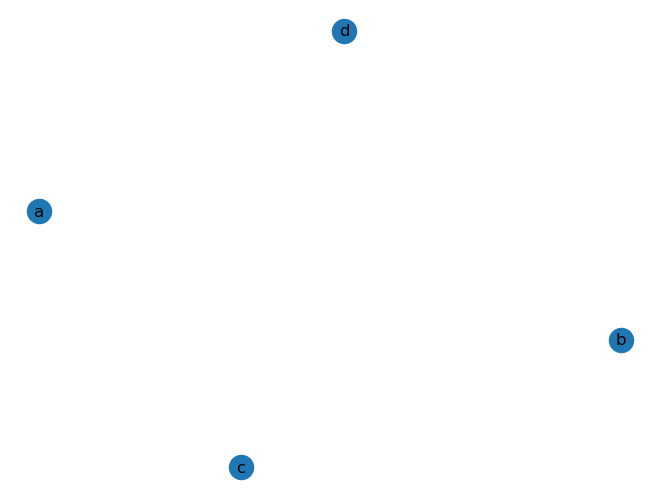

In [2]:
# a "plain" graph is undirected, create the empty graph
G = nx.Graph()

# you can add nodes to the graph. Give each node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list, instead of doing one by one
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# let's see how it is going: draw the graph
nx.draw(G, with_labels=True)

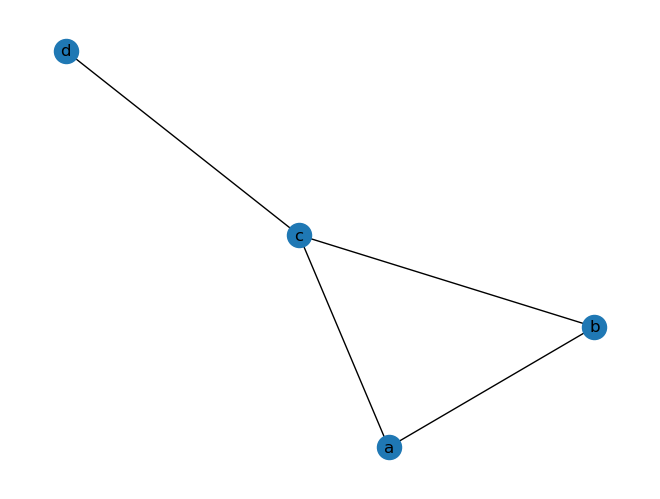

In [3]:
# We need to stablish relationships among these agents. Add and edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence, not one by one
# edges should be specified as 2-tuples, that is using these "(" ")" braquets
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

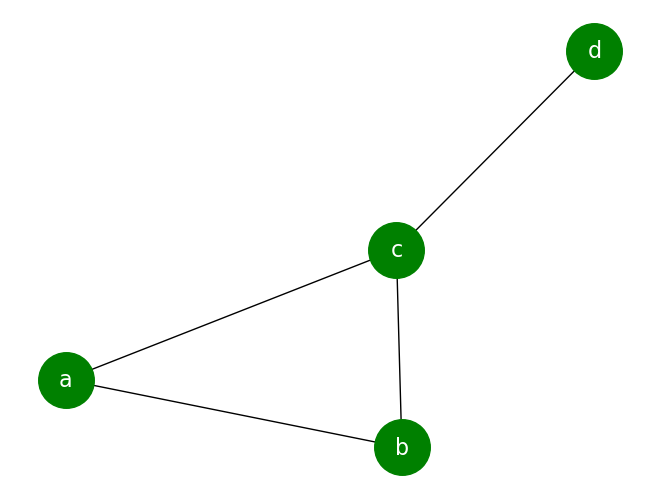

In [4]:
nx.draw(G,
        with_labels=True,
        node_color='green',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h3> Exercise 1</h3>
Create the undirected graph corresponding to this simple network

![title](./images/figure1.png)
</div>

In [5]:
# write your code here and run it ################

In [6]:
# SOLUTION: uncomment line below to load solution
# %load ./snippets/ex1.py

## Creating non-simple Graphs - Edge properties
As we have seen, we can add different attributes to edges and nodes to enrich the information contained in the network. Usually much information can be incuding regarding the "interaction" between a couple of nodes. The most frequent examples are direction and weigth.

### Directed graphs
Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs. Let's create a **Directed graph** (take notice they are a different class from the undirected basic `Graph` class)

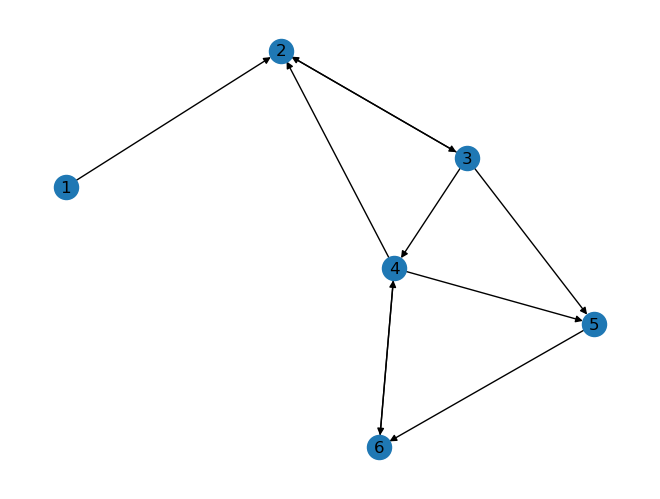

In [7]:
#creating a directed empty graph
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)]) #add the edges (this automatically creates the nodes)

nx.draw(D, with_labels=True)

Note that in the case of directed graphs the figure automatically displays the arrows indicating the direction of the edge. your turn!

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h3> Exercise 2</h3>
Create the directed graph corresponding to this simple network

![title](./images/figure2.jpg)
</div>

In [8]:
# write your code here and run it 

In [9]:
# SOLUTION: uncomment line below to load solution
#%load ./snippets/ex2.py

### Weighted graphs
We can add further information to the edges between nodes. Including the weigth of the interaction is very frequent. We can create a weighted network by adding the `ẁeigth` attribute to the edges in the network 

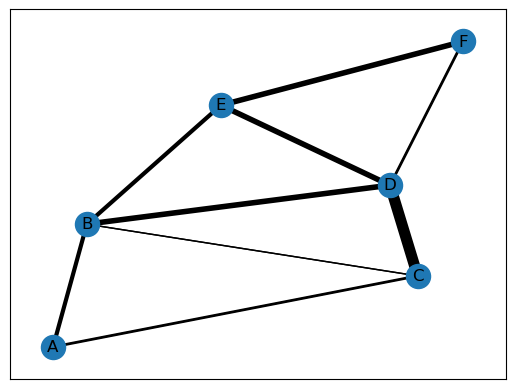

In [10]:
WG = nx.Graph()

weighted_edges=[('A', 'B',3), ('A', 'C',2),('B', 'C',1),('B', 'E',3), ('C', 'D',8), ('E', 'F',4),('D', 'F',2),('B', 'D',4),('E', 'D',4)] #a lis ofweighted edges, note they have three values, node from, node to, and weight
WG.add_weighted_edges_from(weighted_edges) #add the list of edges to the network

#now let's plot it
pos=nx.spring_layout(WG) # we need to get the position of the nodes to after add the node labels
nx.draw_networkx(WG,pos)
w = nx.get_edge_attributes(WG,'weight') #get the edge attribute ẁeigth'
nx.draw_networkx_edges(G = WG, pos = pos, edge_color='k', width=list(w.values())) #representing the weigth tih the thickness of the link
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #if you wat to see the weigth

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h3> Exercise 2.B</h3>
One of the most frequent uses of weighted networks is obtaining the weighted one-mode projections of bipartite networks.
    
What would be one mode network of people from this bipartite network of people that have met in different partys? 
    
What do these weights represent?
    
Write the "person" projection of this bipartite network and represent it.
    
![title](./images/figure2b.png)
</div>

In [11]:
# your code here

In [12]:
# SOLUTION: uncomment line below to load solution
# %load ./snippets/ex2b.py


### Custom attributes & MultiGraphs
In some cases we need to create our own attributes. For example imagine you have two social media netorks, the "blue app" and the "red app". you can keep the information of the social network that is connecting two given people by creating the atribute "color" (or any other of your choosing), like this

[(1, 2, {'app': 'red'}), (1, 5, {'app': 'red'}), (1, 3, {'app': 'blue'}), (2, 5, {'app': 'red'}), (5, 4, {'app': 'blue'}), (5, 3, {'app': 'blue'})]


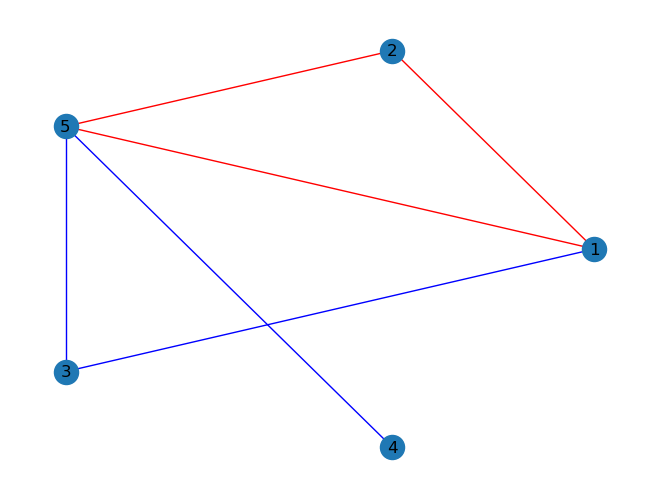

In [13]:
G = nx.Graph()
G.add_edge(1,2,app='red')
G.add_edge(1,5,app='red')
G.add_edge(2,5,app='red')
G.add_edge(1,3,app='blue')
G.add_edge(4,5,app="blue")
G.add_edge(3,5,app="blue")
print(G.edges(data=True)) #lets see those edges

#and now lets see the graph
pos = nx.circular_layout(G)
edges = G.edges()
colors = [G[u][v]['app'] for u,v in edges]
nx.draw(G, pos, edge_color=colors, with_labels=True)

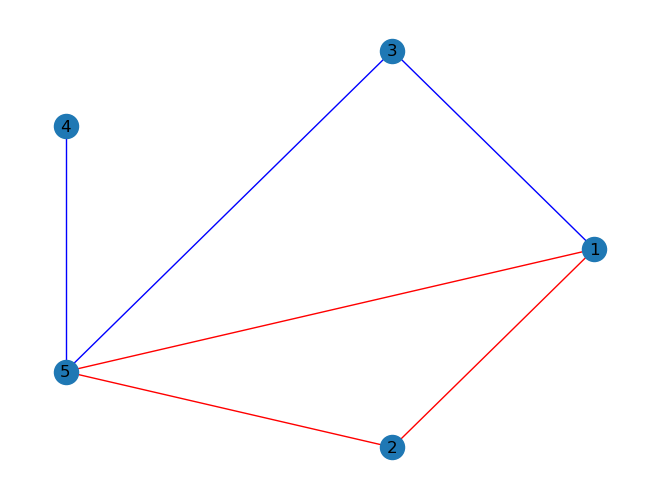

In [14]:
G = nx.Graph()
blue_edges_to_add = [(1, 3), (4, 5), (3, 5),(1,2)]
red_edges_to_add = [(1, 2), (1, 5), (2, 5)]
G.add_edges_from(blue_edges_to_add, app="blue")
G.add_edges_from(red_edges_to_add, app="red")

#and now lets see the graph
pos = nx.circular_layout(G)
edges = G.edges()
colors = [G[u][v]['app'] for u,v in edges]
nx.draw(G, pos, edge_color=colors, with_labels=True)

However, this only works if each pair is only connected by ONE type of app. If you want to have more than one class of edges between a pair of nodes, It is easier to include this extra information in the networkX format using `MultiGraph`. 
This allows you to have multiple types of edges between the nodes (parallel edges), one of each type.

[(1, 3, {'app': 'blue'}), (1, 2, {'app': 'blue'}), (1, 2, {'app': 'red'}), (1, 5, {'app': 'red'}), (3, 5, {'app': 'blue'}), (4, 5, {'app': 'blue'}), (5, 2, {'app': 'red'})]


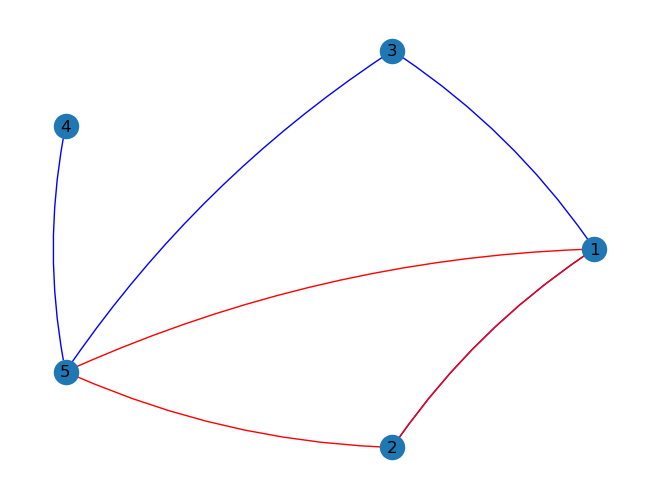

In [15]:
MG = nx.MultiGraph() #create empty multigraph
blue_edges_to_add = [(1, 3), (4, 5), (3, 5),(1,2)]
red_edges_to_add = [(1, 2), (1, 5), (2, 5)]
MG.add_edges_from(blue_edges_to_add, app="blue")
MG.add_edges_from(red_edges_to_add, app="red")

print(MG.edges(data=True)) #see the edges with the attributes
pos = nx.circular_layout(MG)
edges = MG.edges()

colors = []
for (u,v,attrib_dict) in list(MG.edges.data()): #they are a little more difficult to acess than the normal graphs, as you see
    colors.append(attrib_dict['app'])

nx.draw(MG, pos, edge_color=colors,connectionstyle='arc3, rad = 0.1', with_labels=True)


<div class="alert alert-block alert-success"><b>Up to you:</b>
<h3> Exercise 3</h3>
    
Create a Graph that contains all the information of these movements of people between 3 cities. The information below shows the number of people that travelled from the starting city, to the destination city using a given transportation method (either train, plane, or car). 
    
**Hint:** you can add weighted edges to a MultiGraph or MultiDiGraph with the method: MG.add_weighted_edges_from([list of weighted edges]), where the list of weighted edges has this form [(start node, end node, weigth), .... ] 

<img src="./images/figure3.png" width="500"/>
    
    
</div>

In [16]:
# write your code here and run it 
MDG = nx.MultiDiGraph()

In [17]:
# SOLUTION: uncomment line below to load solution
# %load ./snippets/ex3.py


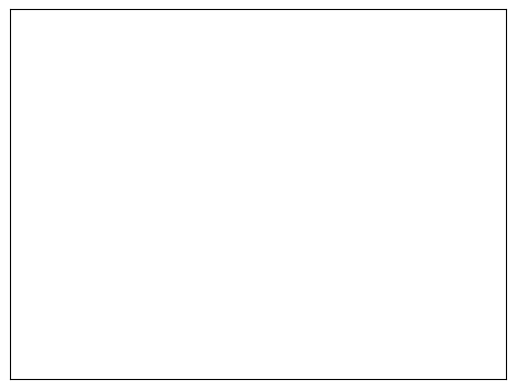

In [18]:
#visualize it
draw_colored_multigraph(MDG)

These are what are know as multi-layered networks, where each layer usually represents one different type of interaction among the agents. In the particular case where the agents are the same in all layers of interactions, they are called multiplex networks. 
To work with them I recommend using this python library: Pymnet 
https://mnets.github.io/pymnet/index.html

You have a comparative of softwares in the supp. material of the course.


## Creating non-simple Graphs - Node properties
In some cases we have different clases of nodes, for examples actors and films, writers and books, plants and pollinators. In this case the interactions only take place between nodes of different sets. These types of networks are called **bipartite nnetworks** (because we have two different types of nodes), or multipartite networks if we have more than two different sets. Now, the attribute belongs to the **node**, not to the link. 

### Bipartite graphs
This type of networks are very used, and networkx has its own section to work with them, the `bipartite` algorithm section. NetworkX does **not** have a custom bipartite graph class but the Graph() or DiGraph() classes can be used to represent bipartite graphs. However, you have to keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set. The convention used in NetworkX is to use a node attribute named `bipartite` with values 0 or 1 to identify the sets each node belongs to. This convention is not enforced in the source code of bipartite functions, it’s only a recommendation.. Let's see how we can create a bipartite network.

In [19]:
from networkx.algorithms import bipartite #we load the bipartite algorithms to facilitate writing the code

B = nx.Graph()

# Add nodes with the node attribute "bipartite" (you can choose any name for the attribute, and its values)
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

> BEWARE: Many algorithms of the bipartite module of NetworkX require, as an argument, a container with all the nodes that belong to one set, in addition to the bipartite graph B. 
> The functions in the bipartite package do not check that the node set is actually correct nor that the input graph is actually bipartite. 

#### Obtaining the bipartite sets
If B is connected, you can find the two node sets using a two-coloring algorithm. However, if the input graph is not connected, there are more than one possible colorations, and raise an `AmbiguousSolution Exception` if the input graph for bipartite.sets is disconnected. In these cases, Using the bipartite node attribute, you can easily get the two node sets

In [20]:
#if B is connected, you can safely use the coloring algorithm to return the species sets
nx.is_connected(B)
bottom_nodes, top_nodes = bipartite.sets(B)
print(bottom_nodes)
print(top_nodes)

{1, 2, 3, 4}
{'b', 'c', 'a'}


In [21]:
#if B is not connected retrieve the node sets with the bipartite attribute:
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes
print(top_nodes)
print(bottom_nodes)

{1, 2, 3, 4}
{'b', 'c', 'a'}


<div class="alert alert-block alert-success"><b>Up to you:</b>
<h4> Exercise 4</h4>
    
Obtain the bipartite sets of the Bipartite network below (Bnet), by any of the methods explained above
    
</div>

In [22]:
#Genate a Bipartie network
Bnet=bipartite.random_graph(4, 5, 0.4, seed=None, directed=False)
# write your code here and run it 

In [23]:
# %load ./snippets/ex4.py
connected=nx.is_connected(Bnet)

#if network is connected then obtain the sets with the coloring algorithm
if connected:
    bottom_nodes, top_nodes = bipartite.sets(Bnet)
else:
    top_nodes = {n for n, d in Bnet.nodes(data=True) if d["bipartite"] == 0}
    bottom_nodes = set(Bnet) - top_nodes
    
print(top_nodes)
print(bottom_nodes)

{0, 1, 2, 3}
{4, 5, 6, 7, 8}


#### Visualizing bipartite networks
Bipartite networks are specially easy to identify when plotted using this layout

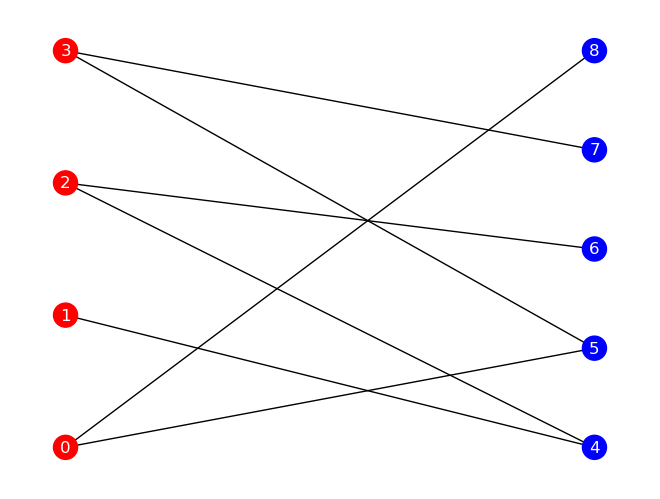

In [24]:
pos = nx.bipartite_layout(Bnet, top_nodes) #assing position to the nodes acoording to their bipartite property
color_dict={0:"red",1:"blue"} #dictionary of node color, each bipartite set is asociated to a different color
colors = [color_dict[node[1]['bipartite']] for node in Bnet.nodes(data=True)]
nx.draw(Bnet, pos, node_color=colors, with_labels=True,font_color='white')

#### One mode projection of bipartite networks
in some cases one is intersted on how the nodes of one of the sets is relatd to other nodes in the same set, trough their connections (for example what scientists have collaborated in papers). We can octain this with the one mode projection ofthe bipartite network with the `projected_graph` function. If we want to know how many shared pertners connect two nodes in a set (in how many papers two scientists have collaborated, for example) we can use the weighted version.

In [25]:
#unweighted version
top_graph = bipartite.projected_graph(Bnet, top_nodes)
bottom_nodes=bipartite.projected_graph(Bnet, bottom_nodes)

#or the weighted version
top_graph = bipartite.weighted_projected_graph(Bnet, top_nodes)
bottom_nodes=bipartite.weighted_projected_graph(Bnet, bottom_nodes)

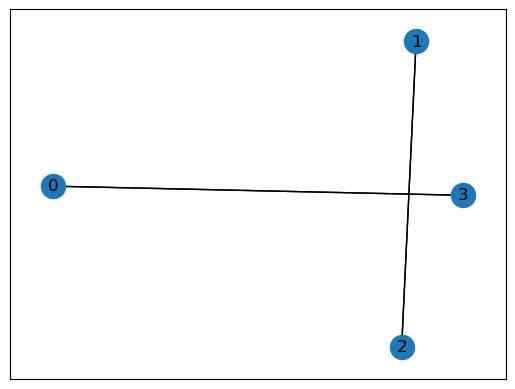

In [26]:
#now let's plot the weighted version
pos=nx.spring_layout(top_graph) # we need to get the position of the nodes to after add the node labels
nx.draw_networkx(top_graph,pos)
w = nx.get_edge_attributes(top_graph,'weight') #get the edge attribute ẁeigth'
nx.draw_networkx_edges(G = top_graph, pos = pos, edge_color='k', width=list(w.values())) #representing the weigth tih the thickness of the link
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #if you wat to see the weigth

<div class="alert alert-block alert-success"><b>Up to you:</b>
<h4> Exercise 4b</h4>
    
Obtain the weighted people proyection of the person \& party bipartite netowkr from before and represent it. The bipartite networks is already provided.
    
    
</div>

In [27]:
#Generating the bipartite network
people = ["Paul", "John", "George", "Richard"]
parties = ["new year", "G. Birthday", "summer solstice"]

# Create an empty bipartite graph
Bparty = nx.Graph()
# Add the nodes with the bipartite attribute (set 0 for people, set 1 for parties)
Bparty.add_nodes_from(people, bipartite=0)  # People are in set 0
Bparty.add_nodes_from(parties, bipartite=1)  # Parties are in set 1
# Randomly create edges between people and parties

Bparty.add_edge("George", "summer solstice")
Bparty.add_edge("George", "new year")
Bparty.add_edge("Paul", "new year")
Bparty.add_edge("John", "new year")
Bparty.add_edge("John", "summer solstice")
Bparty.add_edge("John", "G. Birthday")
Bparty.add_edge("Richard", "G. Birthday")
Bparty.add_edge("Richard", "summer solstice")
       
#continue your code here

In [31]:
Bparty.edges()

EdgeView([('Paul', 'new year'), ('John', 'new year'), ('John', 'summer solstice'), ('John', 'G. Birthday'), ('George', 'summer solstice'), ('George', 'new year'), ('Richard', 'G. Birthday'), ('Richard', 'summer solstice')])

In [32]:
# %load ./snippets/ex4b.py
   # Weighted projection where weights represent the number of parties attended together
people_projection = nx.bipartite.weighted_projected_graph(Bparty, people)

In [33]:
people_projection.edges(data=True)

EdgeDataView([('Paul', 'George', {'weight': 1}), ('Paul', 'John', {'weight': 1}), ('John', 'George', {'weight': 2}), ('John', 'Richard', {'weight': 2}), ('George', 'Richard', {'weight': 1})])

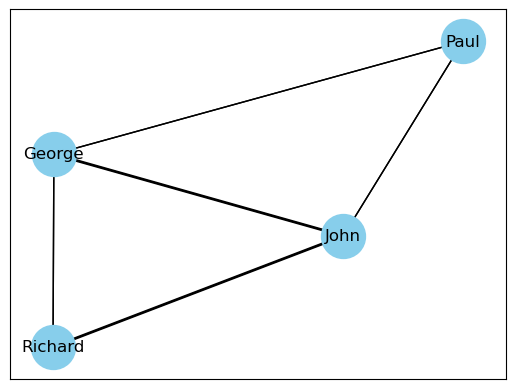

One-mode projection of people (edges and weights):
Paul - George: 1 parties together
Paul - John: 1 parties together
John - George: 2 parties together
John - Richard: 2 parties together
George - Richard: 1 parties together


In [29]:
#now let's plot it
pos=nx.spring_layout(people_projection) # we need to get the position of the nodes to after add the node labels
nx.draw_networkx(people_projection,pos,node_color="skyblue",node_size=1000)
w = nx.get_edge_attributes(people_projection,'weight') #get the edge attribute ẁeigth'
nx.draw_networkx_edges(G = people_projection, pos = pos, edge_color='k', width=list(w.values())) #representing the weigth tih the thickness of the link
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #if you wat to see the weigth
plt.show()

# Print the edges in the one-mode network with their weights
print("One-mode projection of people (edges and weights):")
for u, v, weight in people_projection.edges(data='weight'):
    print(f"{u} - {v}: {weight} parties together")

# Working with network files & formats

### Save to file
Once you are done creating your network, probably you will want to save it. The most useful format for networks with attributes is GML, as it allows to keep these attributes, but is readeable. 
Let's see how it works, and how the information is stored.

In [ ]:
nx.write_gml(MDG, './output/MDG.gml') # a graph with edge attributes
example_file = open('./output/MDG.gml', 'r') #take a look at what is written
print(example_file.read())

Now let's try one with node attributes

In [ ]:
nx.write_gml(Bparty, './output/B.gml') # a graph with node attributes
example_file = open('./output/B.gml', 'r')#take a look at what is written
print(example_file.read())

Other formats supported by NetworkX can be found on https://networkx.org/documentation/stable/reference/readwrite/index.html

### Networks as Dataframes 
Apart from saving them to graph files formats, you may want to transform the network into other formats, such as dataframes containing the **list of interactions** using the `to_pandas_edgelist` function, or the **matrix of interactions** using the `to_pandas_adjacency` function. 

In **one mode networks**, a dataframe containing the list of interactions looks like this:

In [ ]:
#to obtain a dataframe with the interaction list 
WG=people_projection
Idf = nx.to_pandas_edgelist(WG)
Idf

#NOTE 1: you can even export only a subset of the network by choosin the nodes to export like this  nx.to_pandas_edgelist(WG,nodelist=["A", "C"])
#NOTE 2: The edge is only included ONCE, as by default all graphs are UNDIRECTED!!! so A-B is the same as B-A

While the **adjacency matrix** (the matrix containing the interactions) looks like this:

In [ ]:
#to obtain a dataframe with the matrix of interactions. In this case the matrix is NxN as all nodes can interact with each other.
Amat = nx.to_pandas_adjacency(WG)
Amat
#NOTE: you can even export only a subset of the network by choosin the nodes to export like this  nx.to_pandas_edgelist(WG,nodelist=["A", "C"])

If you have networks with edge attributes, they can easily be translated to the **interaction list** format, but NOT for the **adjacency matrix** as it can contain only one number by interaction pair. By default this number is the **SUM** of al edges linking two nodes

In [ ]:
#for more **edge** information rich networks, with the list of interactions you retrieve the information in a square format: each edge attribute is a column 
IdfM = nx.to_pandas_edgelist(MDG) 
print(IdfM.head(5)) #visualize 5 first edges

#BEWARE, for networks containing multiple edge attributes the matrix representation only can contain one number
Amat = nx.to_pandas_adjacency(MDG) #by default is the sum of all the layers.
Amat

For **bipartite networks** or networks with more rich node attributes, we can also use the list of interactions or the matrix representation. 
The **list of interactions** looks similar (here as we don't have edhe attributes it is enough with having just the identity of the linked nodes):

In [ ]:
Bdf=nx.to_pandas_edgelist(Bnet,source='plant',target='pollinator') #source and target are the names for the columns that will be created in the dataframe, they are NOT those stored in the network
Bdf

However the matrix representation is different. We can obtain the **Adjacency matrix** with the basic `to_pandas_adjacency`, with dimension  $(N_A + N_P) x (N_A + N_P)$

In [ ]:
Amat = nx.to_pandas_adjacency(Bnet)
Amat

In order to retrieve the **Incidence matrix** ($N_A x N_P$, or viceversa) you can sub-select just the rows and columns needed

In [ ]:
Amat = nx.to_pandas_adjacency(Bnet) #get full adjacency matrix
Imat = Amat.loc[list(top_nodes), list(bottom_nodes)] #subselect the A vs P interactions
Imat

It is possible (and most time very usefull) to go to and from these two wiews. To go **from the list of interactions** (also called adjacency list) format **to the matrix of interactions** (also called adjacency/Incidence matrix) format, one needs to **pivot** the dataframe:

In [ ]:
Idf

In [ ]:
#Idf.pivot(index="source",columns="target", values="weight").fillna(0)
pivot_df = Idf.pivot_table(index='source', columns='target', values='weight', aggfunc='sum', fill_value=0)
pivot_df

> However, BEWARE!, by default in this case you would obtain the adjacency matrix of a **directed** network, see how not all nodes appear in rows and columns!.

In [ ]:
#To solve this issue when working with dataframes
# Step 1: Duplicate edges to include both directions
reversed_edges = Idf[['target', 'source', 'weight']].rename(columns={'target': 'source', 'source': 'target'})
complete_edge_list = pd.concat([Idf, reversed_edges])
print(complete_edge_list)
# Step 2: Pivot to create an adjacency matrix
adjacency_matrix = complete_edge_list.pivot_table(index='source', columns='target', values='weight', aggfunc='sum', fill_value=0)

# Step 3: (Optional) Fill missing values in case there are self-loops or missing nodes
adjacency_matrix = adjacency_matrix.reindex(index=adjacency_matrix.columns, columns=adjacency_matrix.index, fill_value=0)
adjacency_matrix

With **bipartite networks** it is similar, but in this case we obtain directly the **Incidence matrix**:

In [ ]:
Bdf["value"]=1
Imat=Bdf.pivot(index="plant", columns="pollinator", values="value").fillna(0)
Imat

> Note: In some cases you can make similar calculations using either networks or matrices. For example, you can obtain the weighted unipartite projection using the function of networkX, or by multiplying I*t(I)

In [ ]:
#obtain the number of shared pollinators among plants: A . t(A)
Imat.astype(float).dot(Imat.T.astype(float))

In [ ]:
#obtain the number of shared plants among pollinators: t(A) . A
Imat.T.astype(float).dot(Imat.astype(float))

### Reading from files
Usually you will not have to create yourselve the network, but read it from a file. 
Data can be imported from many different sources and file formats: Adjacency List, Edge List, CSVs, and other more specialized files such as GEXF, GML, Pickle, GraphML, JSON, LEDA, SparseGraph6, Pajek...

Let's see the most common ones: matrices and adjacency or edges lists.

#### Reading a Matrix
Usually these files are in csv format (or excel, easily tranformed to csv format). Let use as an example the web pf life mutualistic matrices of interactions.
Once we have downloaded the csv, let's see how we can create the network.

<div class="alert alert-block alert-success"><b>Up to you:</b>
<h4> Exercise 5</h4>
    
Read the foodweb of the St Marks river stuary, that is stored as an **adjacency matrix**, and create a network with it.
The adjacency matrix is located at:
"./data/WoL_StMarks/st_marks.csv"

</div>

In [ ]:
# write your code here and run it 

In [ ]:
# %load ./snippets/ex5.py
#read the matrix of interaction and store it in the dataframe
filename="./data/WoL_StMarks/st_marks.csv"
Idf=pd.read_csv(filename, header=0, index_col=0)

#probably you will try:
#DG=nx.from_pandas_adjacency(Idf,create_using=nx.DiGraph)
#but it returs an error because it only works for SQUARE matrices!!
#We need to find a better way:

#Since no all species are in the rows and the columns, the default method does NOT work, is better to take this approach:
G = nx.DiGraph()

# Use the stack() function to create a series, and then filter out zeros
edges = Idf.stack().reset_index()
edges = edges[edges[0] != 0]  # Filter out non-interactions (zeros)

# Adding edges to the directed graph
G.add_edges_from(zip(edges['level_0'], edges['level_1']))

# Print nodes and edges to verify
#print("Nodes:", G.nodes)
#print("Edges:", G.edges)

nx.draw(G, with_labels=True)

<div class="alert alert-block alert-success"><b>Up to you:</b>
<h4> Exercise 6</h4>
    
Now, let's read the bipartite seed-dispersal network of the Tronqueira Island from an **Incidence Matrix** and create a **Bipartite network**. The matrix is located at:
"./data/WoL_Tronqueira/tronqueira.csv"

</div>

In [ ]:
# write your code here and run it 

In [ ]:
# %load ./snippets/ex6.py
#Read the Incidence matrix
filename="./data/WoL_Tronqueira/tronqueira.csv"
Idf=pd.read_csv(filename, header=0, index_col=0)
print(Idf.head()) #allways print wath you import!!!!!
Idf=Idf.drop("Number of droppings analysed\"", axis=0)

# Initialize an empty bipartite graph
B = nx.Graph()

# Add producers (rows) and consumers (columns) as nodes
plants = Idf.index
animals = Idf.columns

# Add nodes with a bipartite identifier
B.add_nodes_from(plants, bipartite="plant")  # Set for producers
B.add_nodes_from(animals, bipartite="animal")  # Set for consumers

# Add edges for non-zero interactions, we can also use the matrix directly
for plant in plants:
    for animal in animals:
        if Idf.loc[plant, animal] != 0:
            B.add_edge(plant, animal)

# Now B is your bipartite network
#print("Nodes:", B.nodes)
#print("Edges:", B.edges)

pos = nx.bipartite_layout(B, animals) #assing position to the nodes acoording to their bipartite property
color_dict={"plant":"red","animal":"blue"} #dictionary of node color, each bipartite set is asociated to a different color
colors = [color_dict[node[1]['bipartite']] for node in B.nodes(data=True)]
nx.draw(B, pos, node_color=colors, with_labels=True)

#### Reading an interaction list
It is also very frequent to find networks as interaction lists, where usually the left column denotes the source node, the right column the target node, and other columns edge attributes as weigth. Let's take a look at how these files can look like.

In [ ]:
filename="./data/WoL_StMarks/st_marks_Ilist.csv"
Ilist=pd.read_csv(filename, header=None, index_col=None)
Ilist.columns=["source","target","w"]# since the original file does not have headers in this case, I include the column names. 
#Using "source" and "target" ensures that later the networkN reader will understand the direction automatically.
Ilist

Let create a Network from the interaction list (aka edge list)

In [ ]:
G=nx.from_pandas_edgelist(Ilist, edge_attr="w", create_using=nx.DiGraph)
nx.draw(G, with_labels=True) #Is the same network that above

Bipartite networks rarely are stored as interaction lists, since its more difficult to specify the node attributes in that format.

Apart from these we have seen,  there are much more rich formats to store networks, specially if they have multiple edge or node attributes. 
It is impossible to cover all of them here, because the possibilities are infinite. 
We have here some examples of rich formatting, where I constructed python functions to read the information and store it into a networkX format.

**Lord of the rings** network (unipartite, weighted, with node attributes): Two characters are linked when they appear in the same sentence.

In [ ]:
G=load_LotR_network()

In [ ]:
G.edges(data=True)

In [ ]:
nx.write_gml(G, './output/LotR.gml') # a graph with edge attributes

In [ ]:
G.nodes(data=True)

In [ ]:
# Step 2: Define a color mapping for the node types
type_color_mapping = {
    'per': 'red',
    'pla': 'blue',
    'gro': 'green',
    'thin': 'skyblue'
}

# Step 3: Create a list of node colors based on their 'type' attribute
node_colors = [type_color_mapping[G.nodes[node]['type']] for node in G.nodes]

In [ ]:
# Step 4: Draw the network with node colors
pos = nx.spring_layout(G,iterations=5)  # Generate positions for the nodes
plt.figure(figsize=(8, 6))  # Set the figure size
nx.draw(G, pos, node_color=node_colors, with_labels=True,node_size=100, font_size=10, font_color='white')


**Crime network** (bipartite, with node attributes): Each person is linked to a crime, either because they commited it, because they suffered it, or as a witness 

In [ ]:
B = load_crime_network()
B.edges(data=True)

In [ ]:
nx.write_gml(B, './output/crime.gml') # a graph with edge attributes

In [ ]:
B.nodes(data=True)

In [ ]:
#To obtain the graph of the network
pos = nx.spring_layout(B) #assing position to the nodes acoording to their bipartite property
color_dict={"person":"red","crime":"blue"} #dictionary of node color, each bipartite set is asociated to a different color
colors = [color_dict[node[1]['bipartite']] for node in B.nodes(data=True)]
nx.draw(B, pos, node_color=colors, with_labels=False,node_size=20)